<a href="https://colab.research.google.com/github/flaviorosso/market-breadth-analysis/blob/main/Market_Breadth_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Introduction***

Financial markets are fundamentally driven by human emotions, particularly greed and fear. When a large majority of assets—***around 90%***—are trading ***above*** their ***moving averages***, it often signals that the crowd is overly optimistic, believing in endless gains. Historically, such extreme optimism tends to appear near market tops. Conversely, when ***about 90%*** of assets are trading ***below*** their ***moving averages***, it reflects widespread pessimism. This exaggerated fear can often coincide with market bottoms, presenting potential opportunities for recovery.

This notebook was developed to analyze ***Market Breadth***, aiming to better understand the participation and collective strength of assets during upward or downward movements. The code is structured in a modular way to allow quick adjustments and clear interpretation of results. A key element is the variable ***ma = 17***, which defines the period of the moving average used in the calculations.

This variable was intentionally left as an adjustable fine-tuning parameter, enabling the user to modify its value according to the dataset under analysis or the desired level of data smoothing. By testing different window sizes, the user can identify the most suitable setting for each context.

The main purpose of this notebook is to provide a flexible, practical, and transparent tool to explore market data and uncover collective behavioral patterns beyond the simple observation of market indexes.

[*********************100%***********************]  96 of 96 completed
[*********************100%***********************]  1 of 1 completed


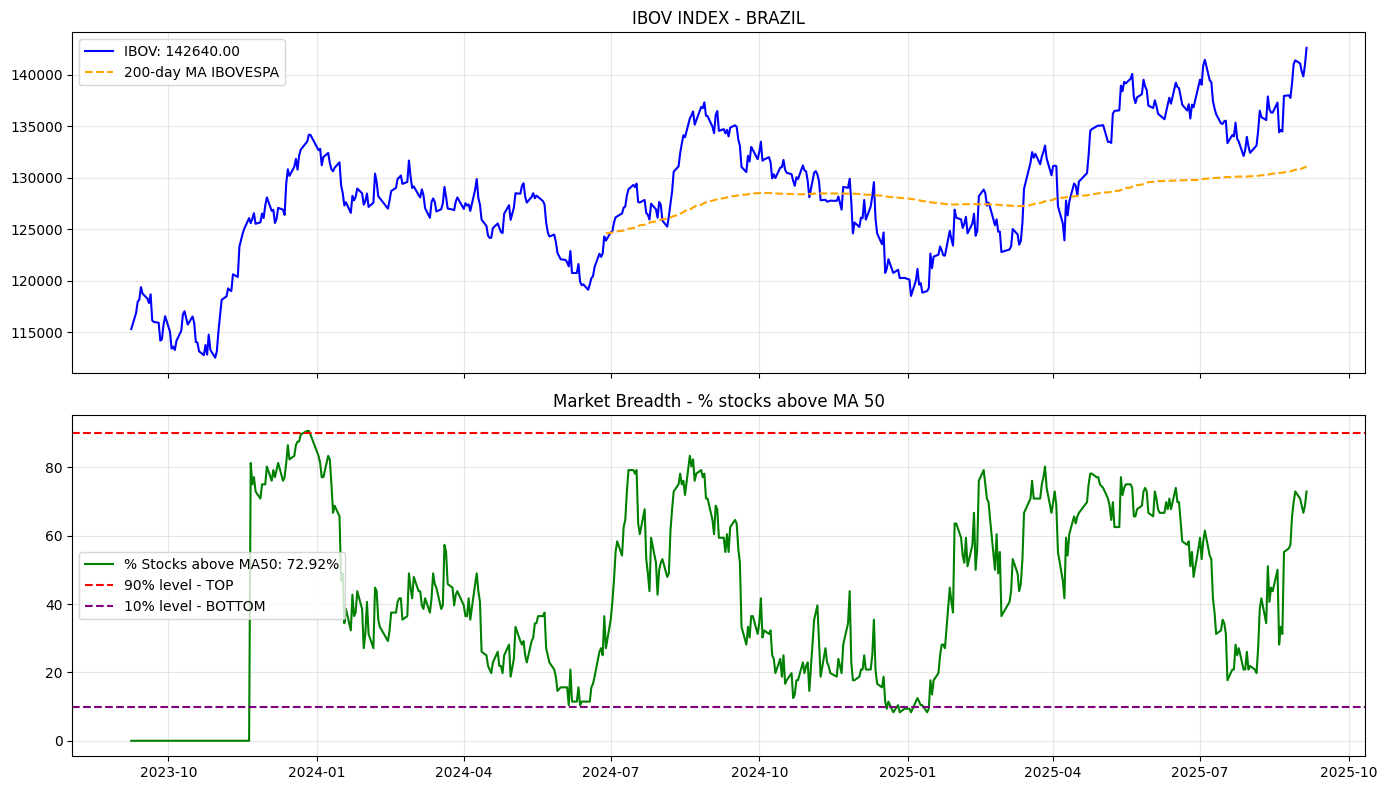

In [12]:
# Market Breadth index to analyze if the market is approaching TOP or BOTTOM
# First experiment IBOVESPA B3 Brazil market

# --- Market Breadth IBOVESPA ---
# Flavio Rosso | Base for GitHub project

!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# ------------------------------
# Parameters
# ------------------------------
start = (dt.datetime.today() - dt.timedelta(days=730)).strftime("%Y-%m-%d")  # last 2 years
end = dt.datetime.today().strftime("%Y-%m-%d")

moving_avg_days = 50   # short-term moving average (configurable)
index_symbol = "^BVSP" # IBOVESPA
# Complete list of IBOVESPA stocks (yfinance format with .SA)
stocks = [
    "ABEV3.SA","ALOS3.SA","ALPA4.SA","AZZA3.SA","ASAI3.SA","AURE3.SA","AZUL4.SA",
    "B3SA3.SA","BBAS3.SA","BBDC3.SA","BBDC4.SA","BBSE3.SA","BEEF3.SA","BHIA3.SA",
    "BOVA11.SA","BPAC11.SA","BRAP4.SA","BRFS3.SA","BRKM5.SA","CASH3.SA","CBAV3.SA",
    "MOTV3.SA","CMIG4.SA","CMIN3.SA","COGN3.SA","CPFE3.SA","CPLE6.SA","CSAN3.SA",
    "CSMG3.SA","CSNA3.SA","CVCB3.SA","CYRE3.SA","DIRR3.SA","DXCO3.SA","ECOR3.SA",
    "EGIE3.SA","ELET3.SA","ELET6.SA","EMBR3.SA","ENEV3.SA","ENGI11.SA","EQTL3.SA",
    "EZTC3.SA","FLRY3.SA","GGBR4.SA","GMAT3.SA","GOAU4.SA","HAPV3.SA","HYPE3.SA",
    "IGTI11.SA","IRBR3.SA","ITSA4.SA","ITUB4.SA","KLBN11.SA","LREN3.SA","LWSA3.SA",
    "MDIA3.SA","MGLU3.SA","MOVI3.SA","MRFG3.SA","MRVE3.SA","MULT3.SA","PCAR3.SA",
    "PETR3.SA","PETR4.SA","PETZ3.SA","PRIO3.SA","PSSA3.SA","RADL3.SA",
    "RAIL3.SA","RAIZ4.SA","RDOR3.SA","RECV3.SA","RENT3.SA","BRAV3.SA","SANB11.SA",
    "SBSP3.SA","SIMH3.SA","SLCE3.SA","SMAL11.SA","SMTO3.SA","STBP3.SA","SUZB3.SA",
    "TAEE11.SA","TIMS3.SA","TOTS3.SA","ISAE4.SA","UGPA3.SA","USIM5.SA","VALE3.SA",
    "VAMO3.SA","VBBR3.SA","VIVA3.SA","VIVT3.SA","WEGE3.SA","YDUQ3.SA"
]

# Note: complete stock list as of 2025-09-05

# ------------------------------
# Download data
# ------------------------------
data = yf.download(stocks, start=start, end=end, auto_adjust=False)["Close"]
index_data = yf.download(index_symbol, start=start, end=end, auto_adjust=False)["Close"]

# ------------------------------
# Moving averages and breadth calculation
# ------------------------------
mm = data.rolling(window=moving_avg_days).mean()

# Signal: 1 if price > moving average, 0 otherwise
signals = (data > mm).astype(int)

# Breadth indicator = % of stocks above the moving average
breadth = signals.mean(axis=1) * 100

# IBOVESPA with 200-day moving average
index_ma200 = index_data.rolling(window=200).mean()

# ------------------------------
# Plotting
# ------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- IBOVESPA ---
if isinstance(index_data, pd.DataFrame):
    col_ibov = index_data.columns[0]  # adjust if necessary
    ibov_series = index_data[col_ibov]
else:
    ibov_series = index_data

last_ibov = ibov_series.iloc[-1]
ax1.plot(ibov_series, label=f"IBOV: {last_ibov:.2f}", color="blue")
ax1.plot(index_ma200, label="200-day MA IBOVESPA", color="orange", linestyle="--")
ax1.set_title("IBOV INDEX - BRAZIL")
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Market Breadth ---
last_breadth = breadth.iloc[-1]
ax2.plot(breadth, label=f"% Stocks above MA{moving_avg_days}: {last_breadth:.2f}%", color="green")
ax2.axhline(90, color="red", linestyle="--", label="90% level - TOP")
ax2.axhline(10, color="purple", linestyle="--", label="10% level - BOTTOM")
ax2.set_title(f"Market Breadth - % stocks above MA {moving_avg_days}")
ax2.legend(loc='center left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



The next step in this project is to extend the analysis to the ***S&P 500***, the most influential stock market index worldwide. Given its central role in the global economy, movements in the U.S. market often ***ripple*** across international markets, making it a crucial reference point for any breadth analysis.

[*********************100%***********************]  499 of 499 completed
[*********************100%***********************]  1 of 1 completed


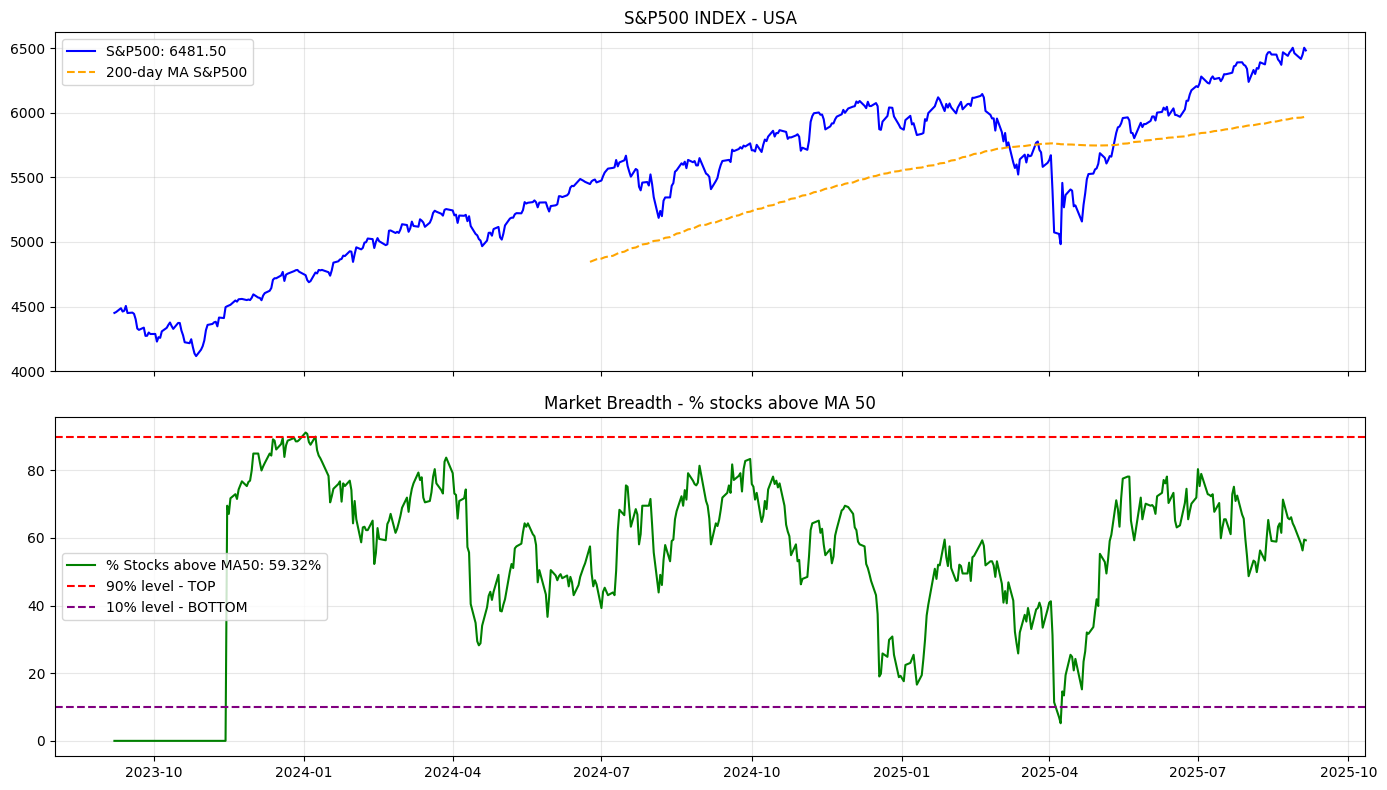

In [11]:
# Market Breadth index to analyze if the market is approaching TOP or BOTTOM
# Second experiment S&P500 - USA market

# --- Market Breadth S&P500 ---
# Flavio Rosso | Base for GitHub project

!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# ------------------------------
# Parameters
# ------------------------------
start = (dt.datetime.today() - dt.timedelta(days=730)).strftime("%Y-%m-%d")  # last 2 years
end = dt.datetime.today().strftime("%Y-%m-%d")

moving_avg_days =50    # short-term moving average (configurable)
index_symbol = "^GSPC"  # S&P500

# Complete list of S&P500 stocks (yfinance format)
# ⚠️ Example reduced list — ideally load full list via API or CSV
stocks = [
    "AAPL","MSFT","NVDA","AMZN","META","GOOGL","GOOG","BRK-B","LLY","AVGO",
    "TSLA","JPM","UNH","XOM","V","PG","JNJ","MA","COST","HD","ABBV","WMT",
    "MRK","NFLX","BAC","KO","CVX","CRM","ADBE","PEP","TMO","ORCL","LIN","AMD",
    "ACN","WFC","MCD","CSCO","ABT","GE","DHR","QCOM","PM","AMGN","INTU","TXN",
    "IBM","PFE","VZ","DIS","NOW","AMAT","CAT","GS","NEE","ISRG","CMCSA","SPGI",
    "RTX","UNP","AXP","T","LOW","HON","VRTX","TJX","MS","UBER","COP","PGR",
    "BKNG","ELV","INTC","BLK","C","ETN","PLD","LMT","REGN","SYK","MU","MMC",
    "CB","BSX","ADI","LRCX","MDT","ADP","AMT","BA","PANW","KLAC","BMY","BX",
    "TMUS","SO","GILD","SCHW","UPS","CI","FI","DE","MDLZ","NKE","DUK","ICE",
    "MO","ANET","SBUX","CL","ZTS","SNPS","MCK","SHW","KKR","EQIX","CVS","WM",
    "TT","APH","CMG","MCO","AON","CDNS","EOG","CME","HCA","TDG","PNC","MMM",
    "PH","NOC","BDX","PYPL","CSX","TGT","USB","FDX","WELL","ORLY","SLB","GD",
    "MSI","ITW","CTAS","EMR","APD","FCX","NXPI","AJG","MPC","ECL","PSX","ABNB",
    "ROP","TFC","NEM","CEG","NSC","CARR","COF","AZO","DHI","AEP","AFL","WMB",
    "MAR","CRWD","ADSK","HLT","SRE","VLO","O","PCAR","SPG","AIG","GM","DLR",
    "CCI","TRV","BK","ROST","URI","OKE","PSA","GEV","KMB","JCI","ALL","D","TEL",
    "MCHP","IQV","CPRT","MET","PRU","LEN","LHX","MSCI","HUM","AMP","A","FIS",
    "F","CMI","CNC","GWW","KMI","PAYX","COR","RSG","PEG","IDXX","STZ","PCG",
    "OXY","FICO","HES","FAST","GIS","IT","OTIS","CTSH","EXC","BKR","YUM","SYY",
    "MPWR","EW","DOW","NUE","CTVA","VRSK","CHTR","HWM","PWR","IR","AME","FTNT",
    "MNST","ODFL","EA","MLM","KR","ACGL","VMC","KDP","KVUE","FANG","GEHC","RCL",
    "EFX","ED","DD","SMCI","EXR","CBRE","HIG","MTD","XEL","VICI","IRM","XYL",
    "RMD","CSGP","EIX","MRNA","ON","GLW","HPQ","BIIB","ROK","TRGP","AVB","ADM",
    "HAL","PPG","WTW","DVN","HSY","LULU","CDW","EBAY","KHC","AWK","WEC","DXCM",
    "NDAQ","FITB","MTB","TSCO","PHM","NVR","WAB","ANSS","DAL","DG","GRMN","ETR",
    "DTE","NTAP","BR","CAH","IFF","STT","DOV","GPN","TROW","LYB","VST","FTV",
    "SBAC","CHD","HPE","EQR","STE","TYL","BRO","VLTO","FSLR","WY","DECK","ZBH",
    "KEYS","ES","TTWO","EL","WST","PPL","VTR","FE","SW","AXON","RJF","AEE","PTC",
    "WAT","DLTR","HBAN","INVH","CINF","HUBB","BALL","MOH","GPC","CPAY","RF",
    "GDDY","APTV","SYF","EQT","LH","LDOS","TDY","BLDR","MKC","CBOE","HOLX","WDC",
    "ATO","CMS","STX","CTRA","CFG","OMC","STLD","COO","TER","WBD","ESS","J","BAX",
    "NTRS","ARE","EXPD","CNP","PKG","TXT","ZBRA","DRI","PFG","TSN","AVY","SWKS",
    "ULTA","MAA","WRB","VRSN","MAS","CLX","BBY","DGX","K","ALGN","IP","EG","CCL",
    "LUV","SWK","FDS","RVTY","EXPE","DOC","NRG","AMCR","ENPH","BG","DPZ","IEX",
    "SNA","KIM","L","AKAM","CAG","VTRS","LNT","KEY","NI","GEN","LVS","POOL","PNR",
    "UAL","CF","PODD","EVRG","JBHT","CE","ROL","LYV","JBL","UHS","NDSN","TRMB",
    "TECH","KMX","CRL","UDR","JKHY","EPAM","SJM","CPT","EMN","AES","CHRW",
    "IPG","HST","ALLE","FFIV","REG","APA","TFX","ALB","QRVO","LKQ","HII","NWSA",
    "MTCH","AOS","BXP","PNW","TAP","HSIC","INCY","CPB","MOS","HRL","MGM","FOXA",
    "AIZ","TPR","GNRC","DAY","WBA","LW","MKTX","HAS","FRT","PAYC","BF-B","FMC",
    "MHK","SOLV","BBWI","GL","CZR","BWA","IVZ","WYNN","DVA","NCLH","ETSY","BIO",
    "RL","AAL","BEN","PARA","FOX","NWS"
]

# ------------------------------
# Download data
# ------------------------------
data = yf.download(stocks, start=start, end=end, auto_adjust=False)["Close"]
index_data = yf.download(index_symbol, start=start, end=end, auto_adjust=False)["Close"]

# ------------------------------
# Moving averages and breadth calculation
# ------------------------------
mm = data.rolling(window=moving_avg_days).mean()

# Signal: 1 if price > moving average, 0 otherwise
signals = (data > mm).astype(int)

# Breadth indicator = % of stocks above the moving average
breadth = signals.mean(axis=1) * 100

# S&P500 with 200-day moving average
index_ma200 = index_data.rolling(window=200).mean()

# ------------------------------
# Plotting
# ------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- S&P500 ---
if isinstance(index_data, pd.DataFrame):
    col_index = index_data.columns[0]  # adjust if necessary
    sp500_series = index_data[col_index]
else:
    sp500_series = index_data

last_index = sp500_series.iloc[-1]
ax1.plot(sp500_series, label=f"S&P500: {last_index:.2f}", color="blue")
ax1.plot(index_ma200, label="200-day MA S&P500", color="orange", linestyle="--")
ax1.set_title("S&P500 INDEX - USA")
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Market Breadth ---
last_breadth = breadth.iloc[-1]
ax2.plot(breadth, label=f"% Stocks above MA{moving_avg_days}: {last_breadth:.2f}%", color="green")
ax2.axhline(90, color="red", linestyle="--", label="90% level - TOP")
ax2.axhline(10, color="purple", linestyle="--", label="10% level - BOTTOM")
ax2.set_title(f"Market Breadth - % stocks above MA {moving_avg_days}")
ax2.legend(loc='center left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
